In [1]:
#library
import cv2
from cv2 import cvtColor
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure
# ------------------------------------------------------------------------------------------ #

In [2]:
# Lab 3.1
img1 = cv2.imread('Image3.jpg')
a = 1.0
b = 0
fps = 15
h = img1.shape[0]
w = img1.shape[1]
size = (w,h)
img_array = []
for  y in np.arange(0.1, 3.0, 0.01):
   Im_gamma = np.uint8((a*((img1/255)**y)+b)*255)
   img_array.append(Im_gamma)

out = cv2.VideoWriter('activity3.mp4',cv2.VideoWriter_fourcc(*'mp4v'), fps, size)
   
for y in range(len(img_array)):
     out.write(img_array[y])
out.release()

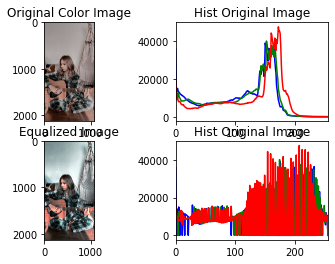

In [17]:
# Lab 3.2
# ☑Histogram Equalization
#---> Using openCV
#------> cv2.equalizeHist()
#---------> R, G, B each channel
# ☑ Visualize Histogram of R,G,B
#---> cv2.calcHist()
img2 = cv2.imread('Image3.jpg')
img2_rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
blue, green, red = cv2.split(img2)

eq_red_image = cv2.equalizeHist(red)
eq_green_image = cv2.equalizeHist(green)
eq_blue_image = cv2.equalizeHist(blue)

eq_image = cv2.merge((eq_red_image,eq_green_image,eq_blue_image))

red_hist = cv2.calcHist([red], [0], None, [256], [0, 255])
green_hist = cv2.calcHist([green], [0], None, [256], [0, 255])
blue_hist = cv2.calcHist([blue], [0], None, [256], [0, 255])

eq_red_hist = cv2.calcHist([eq_red_image], [0], None, [256], [0, 255])
eq_green_hist = cv2.calcHist([eq_green_image], [0], None, [256], [0, 255])
eq_blue_hist = cv2.calcHist([eq_blue_image], [0], None, [256], [0, 255])


# Original Color Image
plt.subplot(2,2,1)
plt.title('Original Color Image')
plt.imshow(img2_rgb)

# Channels Histogram
plt.subplot(2,2,2)
plt.title('Hist Original Image')
plt.plot(blue_hist,color="b")
plt.plot(green_hist,color="g")
plt.plot(red_hist,color="r")
plt.xlim([0, 255])

# Equalized Image
plt.subplot(2,2,3)
plt.title('Equalized Image')
plt.imshow(eq_image)

# Channels Equalized Histogram
plt.subplot(2,2,4)
plt.title('Hist Original Image')
plt.plot(eq_blue_hist,color="b")
plt.plot(eq_green_hist,color="g")
plt.plot(eq_red_hist,color="r")
plt.xlim([0, 255])
plt.show()


In [19]:
# Lab 3.3
def hist_matching(c, c_t, im):
    b = np.interp(c, c_t, np.arange(256))   # find closest matches to b_t
    pix_repl = {i:b[i] for i in range(256)} # dictionary to replace the pixels
    mp = np.arange(0,256)
    for (k, v) in pix_repl.items():
        mp[k] = v
    s = im.shape
    im = np.reshape(mp[im.ravel()], im.shape)
    im = np.reshape(im, s)
    return im

def cdf(im):
    c, b = cumulative_distribution(im)
    #print(b)
    for i in range(b[0]):
        c = np.insert(c, 0, 0)
    for i in range(b[-1]+1, 256):
        c = np.append(c, 1)
    return c

252 255


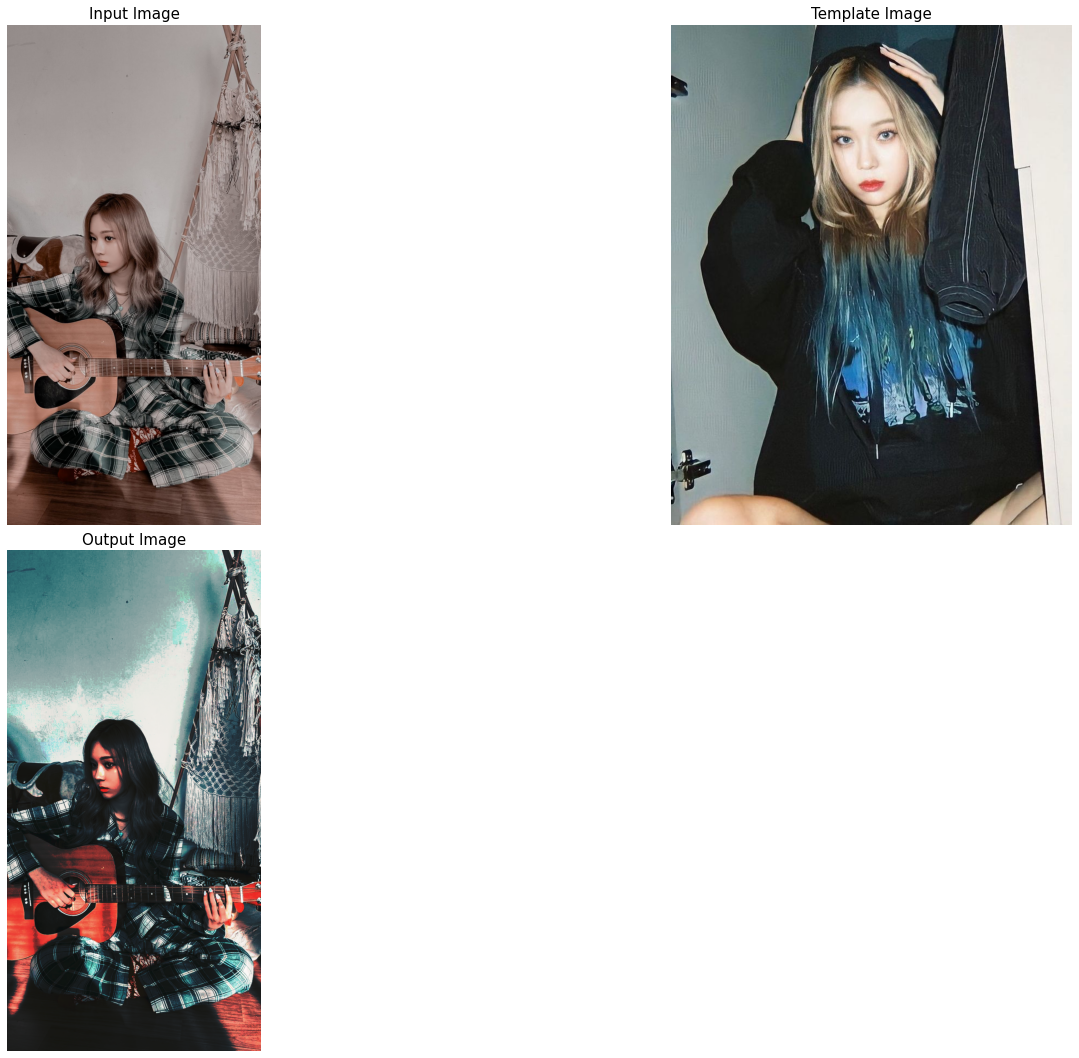

257
257
257
257
257
257
257
257
257


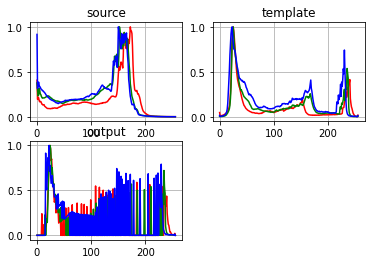

In [38]:
from skimage.exposure import cumulative_distribution
from skimage.io import imread

im = imread('Image3.jpg').astype(np.uint8)
im_t = imread('Image4.jpg')
print(np.max(im), np.max(im_t))

im1 = np.zeros(im.shape).astype(np.uint8)
for i in range(3):
    c = cdf(im[...,i])
    c_t = cdf(im_t[...,i])
    im1[...,i] = hist_matching(c, c_t, im[...,i])


plt.figure(figsize=(20,15))
plt.subplots_adjust(left=0, top=0.95, right=1, bottom=0, wspace=0.05, hspace=0.05)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('Input Image', size=15)
plt.subplot(222), plt.imshow(im_t), plt.axis('off'), plt.title('Template Image', size=15)
plt.subplot(223), plt.imshow(im1), plt.axis('off'), plt.title('Output Image', size=15)
plt.show()


def myHist(img):          
    hist_lst = []
    #for i in np.arange(2, -1, -1):      # b, g, r
    for i in np.arange(0, 3, 1):    # r, g, b
        hist, bin_edges = np.histogram(img[..., i],
                                   256,  # bins : int or sequence of scalars or str, optional
                                   [0, 255])  # range : (float, float), optional
        #print(len(bin_edges), bin_edges.astype("int"))
        print(len(bin_edges))
        hist_lst.append(hist/np.max(hist)) 
        #hist_lst.append(hist)          
    return hist_lst[0], hist_lst[1], hist_lst[2]        #r, g, b


ttl_lst = ['source', 'template', 'output']
for i, img in enumerate([im, im_t, im1]):      # src/template/output
    r, g, b = myHist(img)
    plt.subplot(221 + i)
    plt.plot(r, color='r')
    plt.plot(g, color='g')
    plt.plot(b, color='b')
    #plt.axis('off')
    plt.grid('on')
    plt.title(ttl_lst[i])
plt.show()